# import in the Packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load in the dataset

In [2]:
harms = pd.read_csv('C:/Users/Franc/Documents/PTSD_Analysis/Jupiter_notebook/Harms.csv')

# explore the columns

In [3]:
harms.columns

Index(['study_id', 'Study Class', 'Treatment Focus (Study level)',
       'Intervention Group', 'Treatment Focus (Arm level)',
       'Treatment Focus Subclass', 'Treatment Name', 'NCPTSD Treatment Name',
       'Psychotherapy', 'Psychotherapy Subclass', 'Pharmacotherapy',
       'Pharmacotherapy Subclass', 'CIH', 'CIH Subclass',
       'Nonpharmacologic Biologic', 'Nonpharmacologic Cognitive', 'Control',
       'Other', 'Collaborative Care', 'Format', 'Delivery Method',
       'Arm N Randomized', 'Serious Adverse Event Percent',
       'Serious Adverse Event Detail',
       'Withdrawal Due to Adverse Events Percent',
       'Withdrawal Due to Adverse Events Detail', 'Attempted Suicide Percent',
       'Attempted Suicide Detail', 'Completed Suicide Percent',
       'Completed Suicide Detail', 'Harms Comment',
       'Military Status (Study level)',
       'Active Duty Military Percent (Study level)',
       'Veteran Percent (Study level)', 'Community Percent (Study level)',
       'Fem

# view the counts of Attempted Suicide Percent

In [4]:
harms['Attempted Suicide Percent'].value_counts(dropna=False)

NaN       791
0.0000     53
0.0180      2
0.0357      1
0.0286      1
0.0370      1
0.0071      1
0.0333      1
0.1042      1
0.0210      1
0.0175      1
0.0150      1
0.0250      1
0.0091      1
0.0178      1
0.0270      1
0.0294      1
0.0364      1
0.0063      1
0.0134      1
0.0740      1
Name: Attempted Suicide Percent, dtype: int64

In [5]:
harms.shape

(864, 43)

# recode Attempted Suicide Percent

In [6]:
def recode_ASP (series):
    if series > 0.00:
        return 1
    else:
        return 0

In [7]:
harms['aspRecode']=harms['Attempted Suicide Percent'].apply(recode_ASP)

In [8]:
harms['aspRecode'].value_counts(dropna=False)

0    844
1     20
Name: aspRecode, dtype: int64

# Recode Psychotherapy

In [9]:
def recode_Psychotherapy_h4 (series):
    if series == 'Yes':
        return 1
    else:
        return 0

In [10]:
harms['Psychotherapy'].value_counts(dropna=False)

No     465
Yes    396
NaN      3
Name: Psychotherapy, dtype: int64

In [11]:
harms['psychotherapyRecode']=harms['Psychotherapy'].apply(recode_Psychotherapy_h4)

# Explore the data

In [12]:
harms['psychotherapyRecode'].value_counts(dropna=False)

0    468
1    396
Name: psychotherapyRecode, dtype: int64

In [13]:
harms['Serious Adverse Event Percent'].value_counts(dropna=False)

NaN       638
0.0000    148
0.1000      6
0.0303      4
0.0400      3
         ... 
0.0211      1
0.0180      1
0.0088      1
0.0154      1
0.0182      1
Name: Serious Adverse Event Percent, Length: 64, dtype: int64

In [14]:
harms['Serious Adverse Event Percent'].fillna(0.0, inplace=True)

In [15]:
harms['Serious Adverse Event Percent'].value_counts(dropna=False)

0.0000    786
0.1000      6
0.0303      4
0.0400      3
0.0227      2
         ... 
0.0211      1
0.0180      1
0.0088      1
0.0154      1
0.0182      1
Name: Serious Adverse Event Percent, Length: 63, dtype: int64

# Isolate columns we are going to use

In [16]:
x = harms[['Veteran Percent (Study level)', 'Male Percent (Study level)','psychotherapyRecode','Serious Adverse Event Percent', 'aspRecode' ]]


In [17]:
harms.columns

Index(['study_id', 'Study Class', 'Treatment Focus (Study level)',
       'Intervention Group', 'Treatment Focus (Arm level)',
       'Treatment Focus Subclass', 'Treatment Name', 'NCPTSD Treatment Name',
       'Psychotherapy', 'Psychotherapy Subclass', 'Pharmacotherapy',
       'Pharmacotherapy Subclass', 'CIH', 'CIH Subclass',
       'Nonpharmacologic Biologic', 'Nonpharmacologic Cognitive', 'Control',
       'Other', 'Collaborative Care', 'Format', 'Delivery Method',
       'Arm N Randomized', 'Serious Adverse Event Percent',
       'Serious Adverse Event Detail',
       'Withdrawal Due to Adverse Events Percent',
       'Withdrawal Due to Adverse Events Detail', 'Attempted Suicide Percent',
       'Attempted Suicide Detail', 'Completed Suicide Percent',
       'Completed Suicide Detail', 'Harms Comment',
       'Military Status (Study level)',
       'Active Duty Military Percent (Study level)',
       'Veteran Percent (Study level)', 'Community Percent (Study level)',
       'Fem

In [18]:
harms['Veteran Percent (Study level)'].value_counts(dropna=False)

NaN       462
1.0000    260
0.0000     84
0.1152      4
0.9205      4
0.4000      4
0.8462      3
0.2690      3
0.0684      2
0.8222      2
0.1700      2
0.1190      2
0.0299      2
0.7018      2
0.2000      2
0.0400      2
0.9754      2
0.1000      2
0.9762      2
0.4844      2
0.2250      2
0.4817      2
0.7100      2
0.7857      2
0.2619      2
0.6020      2
0.5880      2
0.3143      2
Name: Veteran Percent (Study level), dtype: int64

In [19]:
x.head

<bound method NDFrame.head of      Veteran Percent (Study level)  Male Percent (Study level)  \
0                              NaN                      0.2551   
1                              NaN                      0.2551   
2                              1.0                      0.9621   
3                              1.0                      0.9621   
4                              NaN                      0.5588   
..                             ...                         ...   
859                            NaN                      0.2857   
860                            1.0                      0.1200   
861                            1.0                      0.1200   
862                            NaN                      0.5530   
863                            NaN                      0.5530   

     psychotherapyRecode  Serious Adverse Event Percent  aspRecode  
0                      1                            0.0          0  
1                      0               

# Drop the NAN's from the dataframe

In [20]:
x=x.dropna()

In [21]:
x.shape

(376, 5)

In [22]:
x.aspRecode.value_counts()

0    366
1     10
Name: aspRecode, dtype: int64

# Create Dataframe pairplot grid

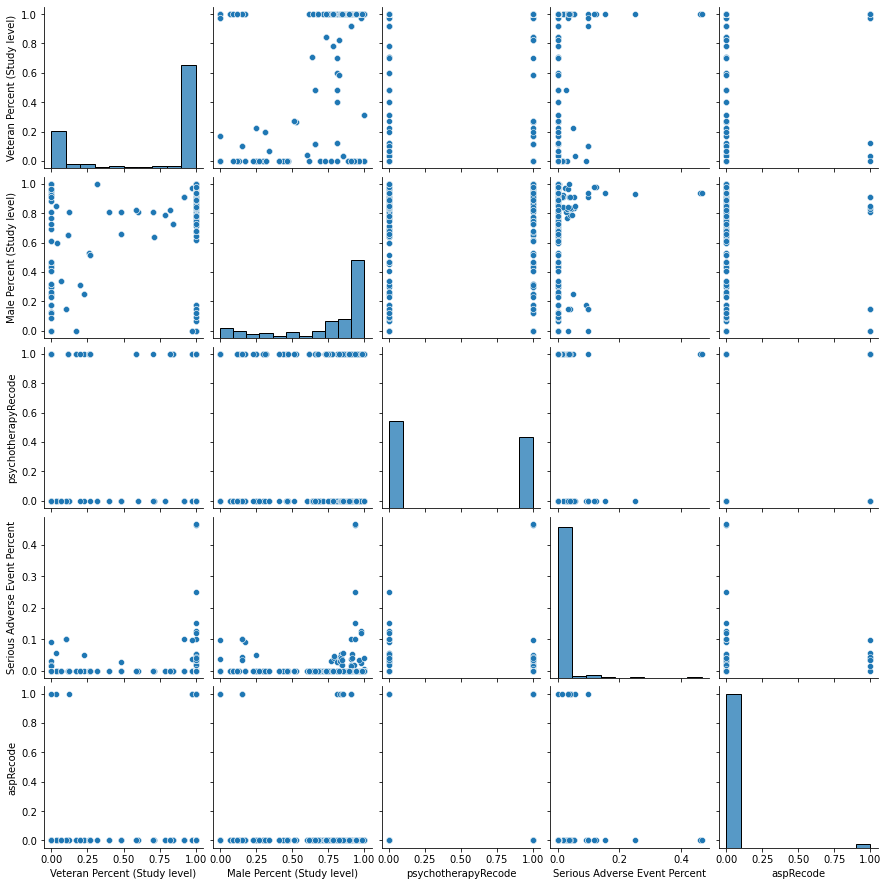

In [23]:
sns.pairplot(x)

# Declare x,y variables

In [24]:
y=x['aspRecode']
x.drop(columns='aspRecode', inplace=True)

C:\Users\Franc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Train Test, Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76, stratify=y)

# Initial decision tree


In [26]:
decisionTree = DecisionTreeClassifier( random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [27]:
treePredictions =decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))

[[109   1]
 [  2   1]]


In [28]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.50      0.33      0.40         3

    accuracy                           0.97       113
   macro avg       0.74      0.66      0.69       113
weighted avg       0.97      0.97      0.97       113



In [29]:
# What this is telling us is that the model was able to predict who was not going to have a suicide attempt, 98% of the time.
# The model was only able to predict 50% of the time, when some one would attempt suicide. Our model was acurate over all 97%
# The high acuracy was driven by an inblanced data set.

# Decision Tree

In [30]:
from sklearn.metrics import plot_confusion_matrix

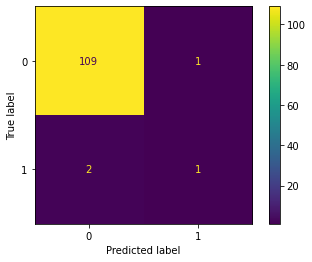

In [31]:
plot_confusion_matrix(decisionTree, x_test, y_test)  
plt.show()


In [32]:
# There was 109 cases where the model predicted 0 suicides and they where 0 suicides.
# 2 cases where the model failed to predicted a suicide when there was one.
# One case where the model predicted a suicied and got it right.
# And one case where the model predicted a suicide and there was none.

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
forest = RandomForestClassifier(random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=76)

In [35]:
print(accuracy_score(y_test, forest.predict(x_test)))

0.9823008849557522


In [36]:
print(classification_report(y_test,forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.33      0.50         3

    accuracy                           0.98       113
   macro avg       0.99      0.67      0.75       113
weighted avg       0.98      0.98      0.98       113



# Random forest confusion matrix

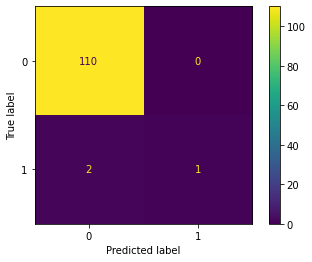

In [37]:
plot_confusion_matrix(forest, x_test, y_test)  
plt.show()

In [38]:
corr = x.corr()

corr.style.background_gradient(cmap='coolwarm')

,Veteran Percent (Study level),Male Percent (Study level),psychotherapyRecode,Serious Adverse Event Percent
Veteran Percent (Study level),1.000000,0.533417,-0.060158,0.072396
Male Percent (Study level),0.533417,1.000000,-0.113282,0.013728
psychotherapyRecode,-0.060158,-0.113282,1.000000,0.003758
Serious Adverse Event Percent,0.072396,0.013728,0.003758,1.000000
